In [1]:
pip install --upgrade ipykernel

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [6]:
# Import libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Sequential, Model,load_model
from tensorflow.keras.applications.resnet import ResNet50,preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import numpy
from glob import glob
import matplotlib.pyplot as plt

2023-03-22 07:05:35.054428: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-22 07:05:35.209701: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-22 07:05:35.209739: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-22 07:05:36.309837: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [7]:
pwd

'/home/jovyan/work'

In [8]:
IMAGE_SIZE = [100,100]
BATCH_SIZE = 50
EPOCHS = 10

train_path = "../work/kaggle/face-exp/images/train/"
test_path = "../work/kaggle/face-exp/images/validation/"

In [9]:
def create_model(model_name, best_model_name):
    
    base_model = model_name(input_shape=IMAGE_SIZE + [3],weights='imagenet', include_top=False)
    
    # don't train existing weights
    for layer in base_model.layers:
        layer.trainable = False
        
    # for getting number of output classes
    folders = os.listdir(train_path)
    
    # our layers
    x = Flatten()(base_model.output)
    
    prediction = Dense(len(folders), activation="softmax")(x)
    
    model = Model(inputs=base_model.input, outputs=prediction)
    
    model.compile(
        loss="categorical_crossentropy",
        optimizer="adam",
        metrics=["accuracy"]
    )
    
    
    train_datagen = ImageDataGenerator(rescale = 1./255,
                              shear_range = 0.2,
                              zoom_range = 0.2,
                              horizontal_flip = True)
    
    test_datagen = ImageDataGenerator(rescale = 1./255)
    
    train_set = train_datagen.flow_from_directory(train_path,
                                                target_size = IMAGE_SIZE,
                                                batch_size = BATCH_SIZE,
                                                class_mode = "categorical")
    
    test_set = test_datagen.flow_from_directory(test_path,
                                              target_size = IMAGE_SIZE,
                                              batch_size = BATCH_SIZE,
                                              class_mode = "categorical")
    
    
    es = EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=50)
    
    mc = ModelCheckpoint(best_model_name, monitor='val_accuracy',mode='max',verbose=1)
    
    r = model.fit(train_set,
              validation_data = test_set,
              epochs = EPOCHS,
              steps_per_epoch = len(train_set),
              validation_steps = len(test_set),
              callbacks=[es, mc])
    
    return r, model, test_set

In [10]:
r, model, test_set = create_model(InceptionV3,'best_inception_model.h5')


2023-03-22 07:05:44.888315: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-22 07:05:44.888366: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-22 07:05:44.888395: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (a2cc0ff2a214): /proc/driver/nvidia/version does not exist
2023-03-22 07:05:44.888612: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Epoch 1/10
577/577 [==============================] - ETA: 0s - loss: 1.7454 - accuracy: 0.3238
Epoch 1: saving model to best_inception_model.h5
577/577 [==============================] - 115s 190ms/step - loss: 1.7454 - accuracy: 0.3238 - val_loss: 1.6431 - val_accuracy: 0.3750
Epoch 2/10
577/577 [==============================] - ETA: 0s - loss: 1.6376 - accuracy: 0.3643
Epoch 2: saving model to best_inception_model.h5
577/577 [==============================] - 107s 186ms/step - loss: 1.6376 - accuracy: 0.3643 - val_loss: 1.6210 - val_accuracy: 0.3831
Epoch 3/10
577/577 [==============================] - ETA: 0s - loss: 1.6071 - accuracy: 0.3781
Epoch 3: saving model to best_inception_model.h5
577/577 [==============================] - 108s 187ms/step - loss: 1.6071 - accuracy: 0.3781 - val_loss: 1.5878 - val_accuracy: 0.3913
Epoch 4/10
577/577 [==============================] - ETA: 0s - loss: 1.602

In [11]:
# Inception Model
model.save('model_inception.h5')
loss, acc = model.evaluate(test_set, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

142/142 - 13s - loss: 1.5712 - accuracy: 0.4042 - 13s/epoch - 92ms/step
Restored model, accuracy: 40.42%


In [12]:
# Inception model while checkpointing
model=load_model('best_inception_model.h5')
loss, acc = model.evaluate(test_set, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

142/142 - 15s - loss: 1.5712 - accuracy: 0.4042 - 15s/epoch - 107ms/step
Restored model, accuracy: 40.42%


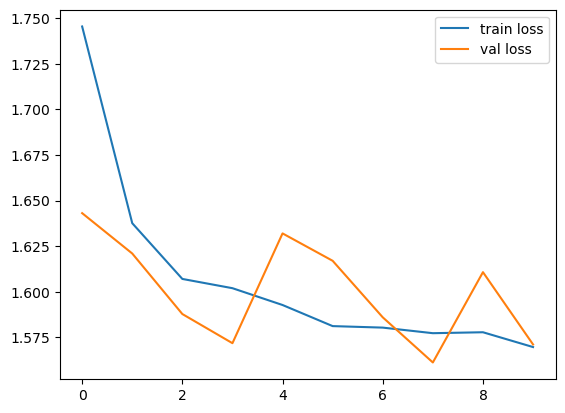

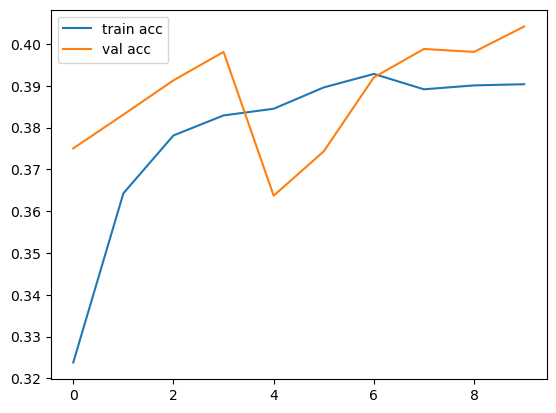

In [13]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
# plt.savefig('AccVal_acc')